### API CRAWLING

In [2]:
pip install tweepy

In [3]:
#import tweepy
import tweepy as tw
from tweepy import OAuthHandler

# API Key and API Secret
consumer_key = 'tKL2PQo0wd8lu1cRtXwQ8kt2t'
consumer_secret = 'aO3DLjGQmp5QcsKwEUECuxCDvB2O9CX0WeJU9vtSQ4uHwERM7s'
access_token = '1314062229902245888-bNzMjrbn7sIlmYSy5Qc13lwVyAsh1v'
access_secret = 'cxe5cLMyyp8OLk7TBPm5SQkYpc7G5hMLdn74f1s3E0J3D'

#Auth
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tw.API(auth)

In [4]:
search_query = "anjir" or "Anjir"

In [5]:
#Get tweets from API
tweets = tw.Cursor(api.search_tweets,
                   q=search_query,
                   lang="id",
                   since="2021-09-01").items(180)

#Store the API Response in a List
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


Total Tweets fetched: 180


In [6]:
import pandas as pd

# intialize the dataframe
tweets_df = pd.DataFrame()

# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

# show the dataframe
tweets_df.head(180)

,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,chocobear🐻,,"if we live fast, let us die young~",False,2022-06-22 10:30:32+00:00,yalord gw ga pgn ngekos anjir😭,None,Twitter for Android
1,Ezalor 🐨,hell crust,Habromania,False,2022-06-22 10:30:31+00:00,"@troopiece Lah anjir, gitu bgt",None,Twitter for iPhone
2,Si helmet Hitam,,enjoy your life!,False,2022-06-22 10:30:29+00:00,"@501Awani Die yg rampas,nk suruh sape pulangka...",None,Twitter for Android
3,nzel👰🏻‍♂️,rant ⁿ³,"hills, i bund out g",False,2022-06-22 10:30:28+00:00,ANJIR CAKEP BGT,None,Twitter for Android
4,️️ ️️tiar,,tidak menerima ajakan meet up alias yang di tw...,False,2022-06-22 10:30:25+00:00,@sosmedkeras jelasin klo penjelasannya salah t...,None,Twitter for Android
...,...,...,...,...,...,...,...,...
175,Childish,,I fuckin' love you,False,2022-06-22 10:25:22+00:00,@notcoolenimor Wkwk anjir,None,Twitter for Android
176,rigel,unlabeled! stranger dnf! dnss!,"harta, tahta, angkasa",False,2022-06-22 10:25:22+00:00,@taebeomu MANA ADA ANJIR YG GUA SEBUT PACAR MA...,None,Twitter for Android
177,"𝙒𝙚𝙘𝙝𝙩𝙚𝙡, micèl.",snd.,#nath : she’s the type of flower that can stil...,False,2022-06-22 10:25:21+00:00,@MINHE97CREW @MILE94CREW anjir ngetiknya kaya ...,None,Twitter for iPhone
178,Trishia,,174cm,False,2022-06-22 10:25:19+00:00,RT @cchauhuyo: gue harus gimana lagi anjir nga...,None,Twitter Web App


In [7]:
newtweets_df  = pd.DataFrame(tweets_df[['text']])
newtweets_df

,text
0,yalord gw ga pgn ngekos anjir😭
1,"@troopiece Lah anjir, gitu bgt"
2,"@501Awani Die yg rampas,nk suruh sape pulangka..."
3,ANJIR CAKEP BGT
4,@sosmedkeras jelasin klo penjelasannya salah t...
...,...
175,@notcoolenimor Wkwk anjir
176,@taebeomu MANA ADA ANJIR YG GUA SEBUT PACAR MA...
177,@MINHE97CREW @MILE94CREW anjir ngetiknya kaya ...
178,RT @cchauhuyo: gue harus gimana lagi anjir nga...


### TEXT PREP

In [8]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [9]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [10]:
#import stopword
from nltk.corpus import stopwords 
stopwords_indonesia = stopwords.words('indonesian')
 
#import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import TweetTokenizer
 
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

In [11]:
import re
import string
def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
 
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    #remove coma
    tweet = re.sub(r',','',tweet)
    
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)
 
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_indonesia and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
 
    return tweets_clean

In [12]:
newtweets_df['Hasil_Pembersihan'] = newtweets_df['text'].apply(lambda x: clean_tweets(x))

In [13]:
newtweets_df

,text,Hasil_Pembersihan
0,yalord gw ga pgn ngekos anjir😭,"[yalord, gw, ga, pgn, ngekos, anjir, ]"
1,"@troopiece Lah anjir, gitu bgt","[anjir, gitu, bgt]"
2,"@501Awani Die yg rampas,nk suruh sape pulangka...","[die, yg, rampasnk, suruh, sape, pulang, , anj..."
3,ANJIR CAKEP BGT,"[anjir, cakep, bgt]"
4,@sosmedkeras jelasin klo penjelasannya salah t...,"[jelasin, klo, jelas, salah, tuh, si, anjir, w..."
...,...,...
175,@notcoolenimor Wkwk anjir,"[wkwk, anjir]"
176,@taebeomu MANA ADA ANJIR YG GUA SEBUT PACAR MA...,"[anjir, yg, gua, pacar, mah, jay]"
177,@MINHE97CREW @MILE94CREW anjir ngetiknya kaya ...,"[anjir, ngetiknya, kaya, org, gpny, agama]"
178,RT @cchauhuyo: gue harus gimana lagi anjir nga...,"[gue, gimana, anjir, ngadepin, dua, , ]"


In [14]:
def remove_punct(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    return text

In [15]:
newtweets_df['Hasil_Pembersihan_2'] = newtweets_df['Hasil_Pembersihan'].apply(lambda x: remove_punct(x))
newtweets_df

,text,Hasil_Pembersihan,Hasil_Pembersihan_2
0,yalord gw ga pgn ngekos anjir😭,"[yalord, gw, ga, pgn, ngekos, anjir, ]",yalord gw ga pgn ngekos anjir
1,"@troopiece Lah anjir, gitu bgt","[anjir, gitu, bgt]",anjir gitu bgt
2,"@501Awani Die yg rampas,nk suruh sape pulangka...","[die, yg, rampasnk, suruh, sape, pulang, , anj...",die yg rampasnk suruh sape pulang anjir
3,ANJIR CAKEP BGT,"[anjir, cakep, bgt]",anjir cakep bgt
4,@sosmedkeras jelasin klo penjelasannya salah t...,"[jelasin, klo, jelas, salah, tuh, si, anjir, w...",jelasin klo jelas salah tuh si anjir wkwkwk
...,...,...,...
175,@notcoolenimor Wkwk anjir,"[wkwk, anjir]",wkwk anjir
176,@taebeomu MANA ADA ANJIR YG GUA SEBUT PACAR MA...,"[anjir, yg, gua, pacar, mah, jay]",anjir yg gua pacar mah jay
177,@MINHE97CREW @MILE94CREW anjir ngetiknya kaya ...,"[anjir, ngetiknya, kaya, org, gpny, agama]",anjir ngetiknya kaya org gpny agama
178,RT @cchauhuyo: gue harus gimana lagi anjir nga...,"[gue, gimana, anjir, ngadepin, dua, , ]",gue gimana anjir ngadepin dua


In [16]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
newtweets_df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in newtweets_df["Hasil_Pembersihan_2"]]
newtweets_df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in newtweets_df["Hasil_Pembersihan_2"]]
newtweets_df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in newtweets_df["Hasil_Pembersihan_2"]]

[nltk_data] Downloading package vader_lexicon to C:\Users\Ameliyah
[nltk_data]     Riskiyah\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
sentiment_df = newtweets_df[["Hasil_Pembersihan_2", "Positive", "Negative", "Neutral"]]
sentiment_df.head(180)

,Hasil_Pembersihan_2,Positive,Negative,Neutral
0,yalord gw ga pgn ngekos anjir,0.0,0.000,1.000
1,anjir gitu bgt,0.0,0.000,1.000
2,die yg rampasnk suruh sape pulang anjir,0.0,0.394,0.606
3,anjir cakep bgt,0.0,0.000,1.000
4,jelasin klo jelas salah tuh si anjir wkwkwk,0.0,0.000,1.000
...,...,...,...,...
175,wkwk anjir,0.0,0.000,1.000
176,anjir yg gua pacar mah jay,0.0,0.000,1.000
177,anjir ngetiknya kaya org gpny agama,0.0,0.000,1.000
178,gue gimana anjir ngadepin dua,0.0,0.000,1.000


In [49]:
x = sum(newtweets_df["Positive"])
y = sum(newtweets_df["Negative"])
z = sum(newtweets_df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [50]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  2.43
Negative:  1.679
Neutral:  175.89100000000002


In [52]:
newtweets_df['Hasil_Pembersihan_2'].value_counts()

anjir                                                                                                                     16
ditaa sooo beautiful vidio gua cuman bilang anjir dita cantik banget gangerti gua anak agung                               3
yalord gw ga pgn ngekos anjir                                                                                              1
tp gua takut anjir kalo kesana wkwk kek yg liatin d yg kosong bolong                                                       1
sih anjir                                                                                                                  1
                                                                                                                          ..
kalo shift beh udah kaya beda kelas banget anjir ngak kenal                                                                1
kelas mah batu loncat doang anjir cepet lulus orang kls udah kaya orang beda kelas trus campur ngak interaksi wkwkwkwk     1


In [19]:
newtweets_df.to_csv('hasil_anjir.csv',encoding='utf8', index=False)

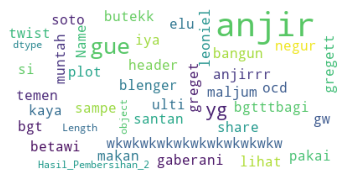

In [20]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['font.size']=12
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)
data = pd.read_csv("hasil_anjir.csv")

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['Hasil_Pembersihan_2']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


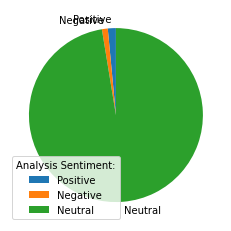

In [35]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([2.697, 1.96, 175.343])
mylabels = ["Positive", "Negative", "Neutral"]
mycolors = ["black", "hotpink", "b", "#4CAF50"]
explode = (0.5, 0.3, 0.2)

plt.pie(y, labels = mylabels, startangle = 90)
plt.legend(title = "Analysis Sentiment:")
plt.show() 

In [1]:
newtweets_df['Hasil_Pembersihan_2'].value_count()

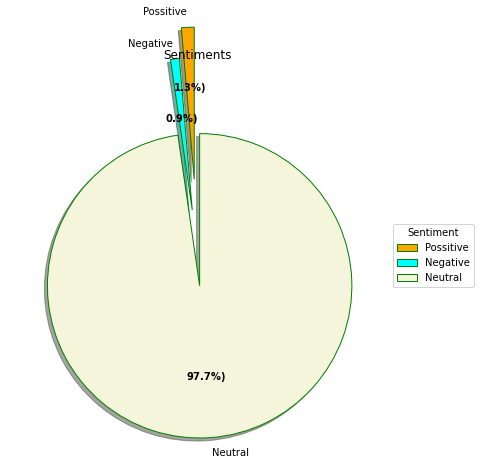

In [47]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset
Sentiment = ['Possitive', 'Negative', 'Neutral']

data = [2.43, 1.68, 175.90]


# Creating explode data
explode = (0.5, 0.3, 0.2)

# Creating color parameters
colors = ( "orange", "cyan", "beige")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
								autopct = lambda pct: func(pct, data),
								explode = explode,
								labels = Sentiment,
								shadow = True,
								colors = colors,
								startangle = 90,
								wedgeprops = wp,
								textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, Sentiment,
		title ="Sentiment",
		loc ="center left",
		bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 10, weight ="bold")
ax.set_title("Sentiments")

# show plot
plt.show()


TypeError: pie() got an unexpected keyword argument 'Sentiment'

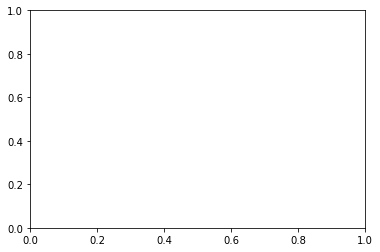

In [43]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
Sentiment = 'Possitive', 'Negative', 'Neutral'
sizes = [2.43, 1.68, 175.90]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, Sentiment=Sentiment, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()